<a href="https://colab.research.google.com/github/AshrafMah/CV-Classification-Task/blob/main/CV_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch  # PyTorch packge
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets  # load datasets
from torchvision.transforms import ToTensor, transforms # transform data
import torch.nn as nn   # basic building block for neural network
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim   # optimizer like SGD
import matplotlib.pyplot as plt # for pltting

In [2]:
train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor() # to tensor object
)

test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:11<00:00, 2271976.07it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136771.34it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2746805.62it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5639142.59it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [15]:
class_names = train.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

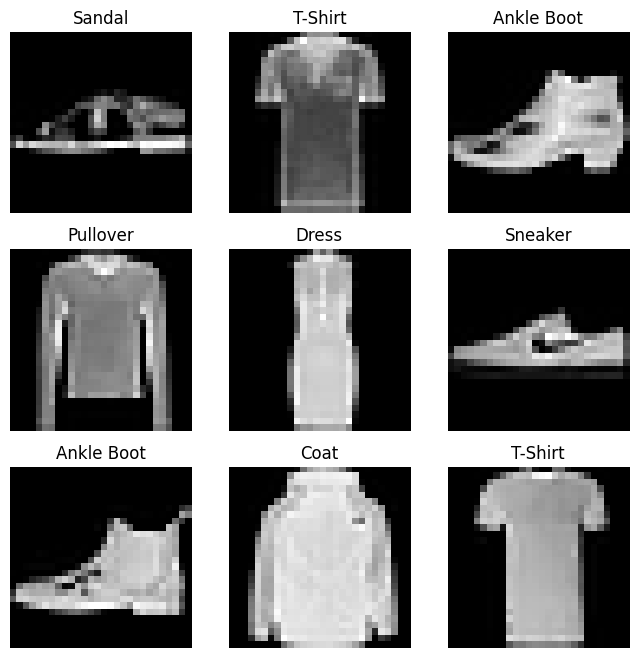

In [3]:
# 10 classes
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
  sample_index = torch.randint(len(train), size=(1,)).item()
  img, label = train[sample_index]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [18]:
# Calculate mean and std
imgs = torch.stack([img for img, _ in train], dim=0)

mean = imgs.view(1, -1).mean(dim=1)    # or imgs.mean()
std = imgs.view(1, -1).std(dim=1)     # or imgs.std()
mean, std

(tensor([0.2860]), tensor([0.3530]))

In [19]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std)])

train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform # to tensor object
)

test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)


In [23]:
train_size = int(0.9* len(train))
val_size = len(train) - train_size

train, validation = torch.utils.data.random_split(dataset=train, lengths=[train_size, val_size])
len(train), len(validation), len(test)

(54000, 6000, 10000)

In [25]:
BATCH_SIZE = 32
NUM_WORKERS = 2

train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(validation, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_loader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

# Let's see no of batches that we have now with the current batch-size
len(train_loader), len(val_loader), len(test_loader)

(1688, 188, 313)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


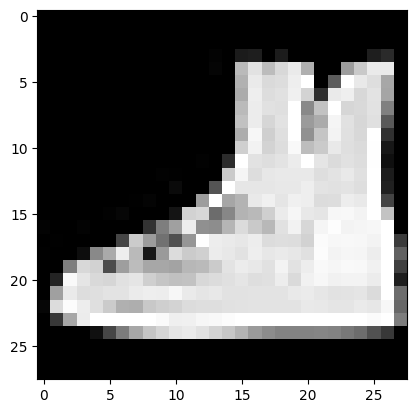

Label: 9


In [21]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# II - Build LeNet-5 architecture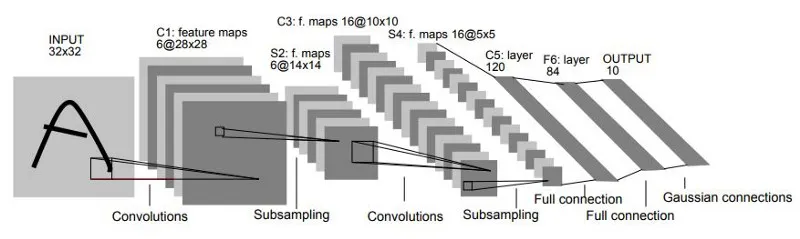

[LeNet-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)


In [ ]:
class LeNet5(nn.Module):
  '''
  Models LeNet5
  '''
  def __init__(self):
    super(LeNet5, self).__init__()


In [12]:
# class Net(nn.Module):
#   '''
#   Models a simple Convlutional Neural Network
#   '''
#   def __init__(self) -> None:
#     super(Net, self).__init__()
#     self.conv1 = nn.Conv2d(1, 6, 5)
#     self.pool = nn.MaxPool2d(2, 2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16*28*28, 120)
#     self.fc2 = nn.Linear(120, 84)
#     self.fc3 = nn.Linear(84, 10)

#   def forward(self, x):
#     '''
#     the forward propagation algorithm
#     '''
#     x = self.pool(F.relu(self.conv1(x)))
#     x = self.pool(F.relu(self.conv2(x)))
#     # x = x.view(-1, 16*28*28)
#     x.flatten(1)
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = self.fc3(x)
#     return x

# net = Net()
# print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


`input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d -> view -> linear -> relu -> linear -> relu -> linear`

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# whatever you are timing goes here
end.record()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4096x4 and 12544x120)